In [170]:
%ls data

sample_submission.csv  submission.csv  test.csv  train.csv


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/train.csv")

In [3]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### First try - use logistic regression to classify digit 8, not digit 8
is it neccesary to reduce dimensions? Let's try without it.
I'm going to do following steps:
- add new column "is_8" to data with value "1" if it's 8 and "0" if it's not;
- shuffle data
- split data into train and test sets
- with train dataset:
 - prepare feaures, labels, initial weights, learning rate, number of iterations
 - run training
- check predictions on test data

In [174]:
# create column for bias
df['pixel784'] = 1
for i in range(10):
    df['is_%d' % i] = df['label'] == i
    df = df.astype({'is_%d' % i: int})

In [175]:
# shuffle data
df = df.sample(frac=1).reset_index(drop=True)

In [176]:
# 70% of 42000 rows is 29400
train = df[:29400]
test = df[29400:]

In [177]:
# prepare feaures
features = train.loc[:, 'pixel0':'pixel784']
# normalization, because we know that max value is 254
features = features
features.shape

(29400, 785)

In [178]:
# prepare labels
labels = train.loc[:, 'is_0':'is_9']
labels.shape

(29400, 10)

In [179]:
#inital weights
weights = 10*np.random.rand(10, 785)
weights.shape

(10, 785)

In [180]:
# learning rate and number of iterations
learning_rate = 10
# for 29400 rows and 784 features, one iteration takes 0.36 seconds
iterations = 500

In [181]:
def sigmoid(x):
    return 1. / (1 + np.exp(-x))

In [182]:
def predict(features, weights):
    '''
    Returns 1D array of probabilities
    that the class label == 1
    '''
    z = np.dot(features, weights)
    return sigmoid(z)

In [183]:
def cost_function(features, labels, weights):
    '''
    Returns 1D matrix of predictions
    Cost = ( log(predictions) + (1-labels)*log(1-predictions) ) / len(labels)
    '''
    observations = len(labels)
    
    predictions = predict(features, weights)
    
    #Take the error when label=1
    class1_cost = -labels*np.log(predictions)

    #Take the error when label=0
    class2_cost = (1 - labels)*np.log(1 - predictions)

    #Take the sum of both costs
    cost = class1_cost - class2_cost
    #Take the average cost
    cost = cost.sum()/observations

    return cost

In [184]:
def update_weights(features, labels, weights, lr):
    '''
    Vectorized Gradient Descent
    '''
    N = len(features)

    predictions = predict(features, weights)

    gradient = np.dot(features.T,  predictions - labels)

    # take the average cost derivative for each feature
    gradient /= N

    # multiply the gradient by our learning rate
    gradient *= lr

    # subtract from our weights to minimize cost
    weights -= gradient

    return weights

In [185]:
def train(features, labels, weights, lr, iters):
    cost_history = []

    for i in range(1, iters + 1):
        weights = update_weights(features, labels, weights, lr)

        #Calculate error for auditing purposes
        cost = cost_function(features, labels, weights)
        cost_history.append(cost)

        # Log Progress
        if i % 10 == 0:
            print("iter: " + str(i) + " cost: "+str(cost))

    return weights, cost_history

In [186]:
trained_weights = list(range(10))
cost_history = list(range(10))
for i in range(10):
    trained_weights[i], cost_history[i] = train(features, labels['is_%d' % i], weights[i], learning_rate, iterations)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


iter: 10 cost: inf
iter: 20 cost: inf
iter: 30 cost: inf
iter: 40 cost: inf
iter: 50 cost: inf
iter: 60 cost: inf
iter: 70 cost: inf
iter: 80 cost: inf
iter: 90 cost: inf
iter: 100 cost: inf
iter: 110 cost: inf
iter: 120 cost: inf
iter: 130 cost: inf
iter: 140 cost: inf
iter: 150 cost: inf
iter: 160 cost: inf
iter: 170 cost: inf
iter: 180 cost: inf
iter: 190 cost: inf
iter: 200 cost: inf
iter: 210 cost: inf
iter: 220 cost: inf
iter: 230 cost: inf
iter: 240 cost: inf
iter: 250 cost: inf
iter: 260 cost: inf
iter: 270 cost: inf
iter: 280 cost: inf
iter: 290 cost: inf
iter: 300 cost: inf
iter: 310 cost: inf
iter: 320 cost: inf
iter: 330 cost: inf
iter: 340 cost: inf
iter: 350 cost: inf
iter: 360 cost: inf
iter: 370 cost: inf
iter: 380 cost: inf
iter: 390 cost: inf
iter: 400 cost: inf
iter: 410 cost: inf
iter: 420 cost: inf
iter: 430 cost: inf
iter: 440 cost: inf
iter: 450 cost: inf
iter: 460 cost: inf
iter: 470 cost: inf
iter: 480 cost: inf
iter: 490 cost: inf
iter: 500 cost: inf
iter: 10 

iter: 150 cost: inf
iter: 160 cost: inf
iter: 170 cost: inf
iter: 180 cost: inf
iter: 190 cost: inf
iter: 200 cost: inf
iter: 210 cost: inf
iter: 220 cost: inf
iter: 230 cost: inf
iter: 240 cost: inf
iter: 250 cost: inf
iter: 260 cost: inf
iter: 270 cost: inf
iter: 280 cost: inf
iter: 290 cost: inf
iter: 300 cost: inf
iter: 310 cost: inf
iter: 320 cost: inf
iter: 330 cost: inf
iter: 340 cost: inf
iter: 350 cost: inf
iter: 360 cost: inf
iter: 370 cost: inf
iter: 380 cost: inf
iter: 390 cost: inf
iter: 400 cost: inf
iter: 410 cost: inf
iter: 420 cost: inf
iter: 430 cost: inf
iter: 440 cost: inf
iter: 450 cost: inf
iter: 460 cost: inf
iter: 470 cost: inf
iter: 480 cost: inf
iter: 490 cost: inf
iter: 500 cost: inf
iter: 10 cost: inf
iter: 20 cost: inf
iter: 30 cost: inf
iter: 40 cost: inf
iter: 50 cost: inf
iter: 60 cost: inf
iter: 70 cost: inf
iter: 80 cost: inf
iter: 90 cost: inf
iter: 100 cost: inf
iter: 110 cost: inf
iter: 120 cost: inf
iter: 130 cost: inf
iter: 140 cost: inf
iter: 150

In [210]:
predictions = predict(test.loc[:, 'pixel0':'pixel784'], trained_weights[4])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [211]:
def decision_boundary(prob):
    return 1 if prob >= .5 else 0

In [212]:
def classify(preds):
    '''
    input  - N element array of predictions between 0 and 1
    output - N element array of 0s (False) and 1s (True)
    '''
    decision_boundary_v = np.vectorize(decision_boundary)
    return decision_boundary_v(predictions).flatten()

In [213]:
def accuracy(predicted_labels, actual_labels):
    diff = predicted_labels - actual_labels
    return 1.0 - (float(np.count_nonzero(diff)) / len(diff))

In [214]:
predicted_labels = classify(predictions)
actual_labels = test.loc[:, 'is_4']

In [215]:
accuracy(predicted_labels, actual_labels)

0.9818253968253968

In [216]:
len(predicted_labels), np.count_nonzero(actual_labels), np.count_nonzero(predicted_labels), np.count_nonzero(predicted_labels*actual_labels)

(12600, 1255, 1268, 1147)

In [217]:
np.count_nonzero(predicted_labels*actual_labels) / np.count_nonzero(actual_labels)

0.9139442231075697

In [218]:
precision = np.count_nonzero(predicted_labels*actual_labels) / np.count_nonzero(predicted_labels)

In [219]:
recall = np.count_nonzero(predicted_labels*actual_labels) / np.count_nonzero(actual_labels)

In [220]:
f1 = 2*precision*recall/(precision + recall)

In [221]:
f1

0.909235037653587

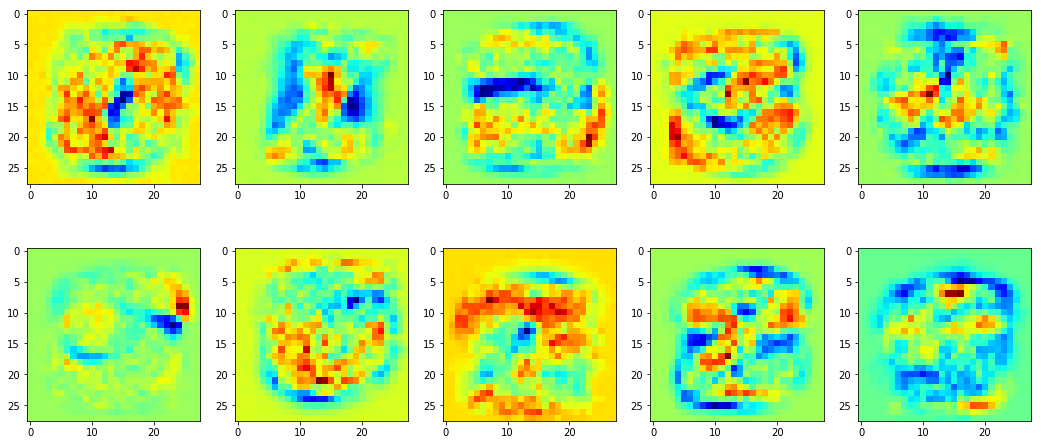

In [201]:
fig = plt.figure(figsize=(18, 8))
for i in range(10):
    weights_pic = trained_weights[i][0:784].reshape(28, 28)
    fig.add_subplot(2, 5, i + 1)
    plt.imshow(weights_pic, cmap='jet')

In [202]:
test_df = pd.read_csv("data/test.csv")

In [203]:
test_df['pixel784'] = 1

In [204]:
test_predictions_df = pd.DataFrame()
for i in range(10):
    test_predictions = predict(test_df.loc[:, 'pixel0':'pixel784'], trained_weights[i])
    test_predictions_df[i] = pd.Series(test_predictions)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [205]:
test_predictions_df.index += 1

In [206]:
test_predictions_df

,0,1,2,3,4,5,6,7,8,9
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [207]:
result = test_predictions_df.idxmax(axis=1)

In [208]:
result.rename('Label', inplace=True)

1        2
2        0
3        8
4        7
5        3
6        7
7        0
8        3
9        0
10       3
11       5
12       7
13       3
14       0
15       4
16       0
17       3
18       1
19       9
20       0
21       9
22       1
23       1
24       0
25       7
26       4
27       2
28       7
29       8
30       7
        ..
27971    5
27972    0
27973    4
27974    8
27975    0
27976    3
27977    6
27978    0
27979    1
27980    9
27981    3
27982    1
27983    8
27984    0
27985    4
27986    5
27987    0
27988    2
27989    1
27990    5
27991    7
27992    6
27993    9
27994    9
27995    7
27996    9
27997    7
27998    3
27999    9
28000    2
Name: Label, Length: 28000, dtype: int64

In [209]:
result.to_csv('data/submission.csv', header=True, index_label='ImageId')

In [227]:
np.random.rand(2, 2, 3)

array([[[ 0.6692159 ,  0.93211759,  0.08157698],
        [ 0.95488864,  0.5898943 ,  0.44349216]],

       [[ 0.75294954,  0.70552139,  0.40314672],
        [ 0.01260074,  0.83690233,  0.67782139]]])